Visualización usando ggplot2
===

* *30 min* | Última modificación: Junio 22, 2019.

**Bibliografía**.

> [ggplot2](http://ggplot2.org) by Hadley Wickham  
[ggplot2: Elegant Graphics for Data Analysis ](http://ggplot2.org/book/) by Hadley Wickham  
[R Graphics Cookbook](https://www.amazon.com/dp/1449316956/ref=cm_sw_su_dp?tag=ggplot2-20) by Winston Chang  


# Librerías

Para poder manipular algunas propiedades de los gráficos (como `options`) es necesario cargar la librería `Cairo`.  Se requieren cargar la  librería para poder usar `ggplot`.

In [1]:
library(Cairo)
library(ggplot2)
library(grid)

## Gráficos de dispersión

Al igual que en el caso de la librería `Lattice`, `ggplot` está diseñada para trabajar con dataframes. En este primer ejemplo, se genera un dataset que contiene la columna de las `x`, la columna `y1` para la función $\sin(x)$ y la columna `y2` para la función $\sin(3x)$. 

In [4]:
# se generan los puntos del eje x
x <- seq(from = -2*pi,        # para `x` desde ...
         to = 2*pi,           # para `x` hasta ...
         length.out = 101 )   # cantidad de puntos

# se generan los puntos de las dos curvas
df0 <- data.frame(x, 
                  y1 = sin(x), 
                  y2 = sin(3*x))

options(repr.plot.width=6, repr.plot.height=4) 

`ggplot` contiene la función `qplot` (quickplot) que permite graficar rápidamente, ya que suple muchos parámetros de los distintos gráficos por valores por defecto. El siguiente ejemplo grafica individualemente cada columna del dataframe.

In [5]:
# Modifica el tamaño del gráfico en la pantalla.
options(repr.plot.width=5, repr.plot.height=3)

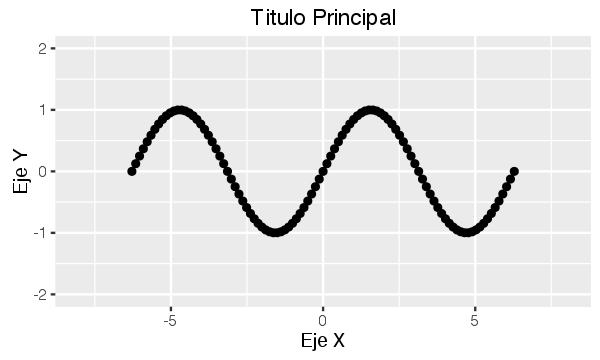

In [6]:
qplot(x = x, 
      y = y1, 
      data = df0, 
      geom = c('line', 'point'),
      xlim = c(-8, 8), 
      ylim = c(-2, 2), 
      xlab = 'Eje X', 
      ylab = 'Eje Y', 
      main = 'Titulo Principal')

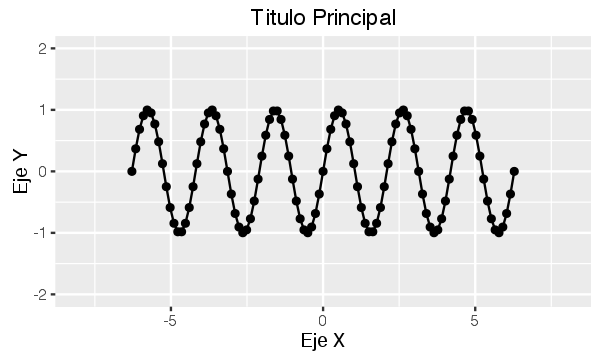

In [7]:
qplot(x = x, 
      y = y2, 
      data = df0, 
      geom = c('line', 'point'),
      xlim = c(-8, 8), 
      ylim = c(-2, 2), 
      xlab = 'Eje X', 
      ylab = 'Eje Y', 
      main = 'Titulo Principal')

## Personalización de gráficos

Las funciones de `ggplot`  devuelven objetos que pueden ser almacenados en variables y que tienen por defecto para su impresión. Para realizar la personalización es necesario utilizar la función `ggplot` la cual produce el fondo del gráfico y da límites a los ejes. Por facilidad, el objeto devuelto por `ggplot` se almacena en la variable `p`.  Note que para visualizar el gráfico, simplemente es necesario imprimir `p`.

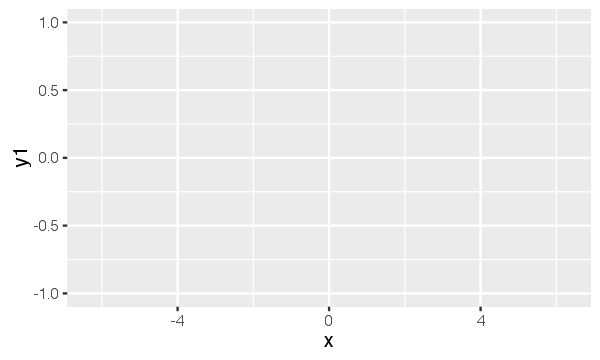

In [8]:
# en este primer paso se grafica el fondo del gráfico.
p <- ggplot(df0, aes(x, y1))
p

En `ggplot`, el operador `'+'` se encuentra sobrecargado y permite 'sumar' propiedades al objeto devuelto por `ggplot`. `geom_lines` es la función que grafica las líneas.

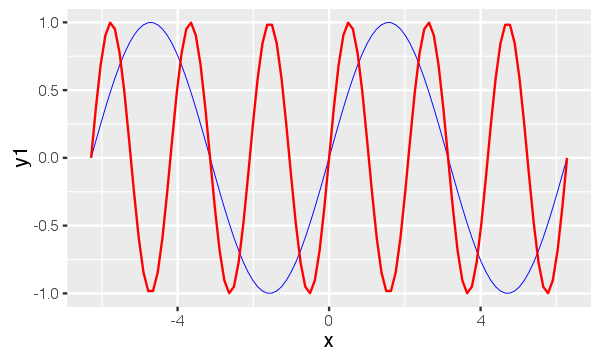

In [9]:
p <- p +                            # el objeto anterior
     geom_line(aes(x, y1),          # selecciona la columna y1
               data = df0,          # del dataframe df
               color = 'blue',      # color
               size = 0.2)       +  # espesor de la línea. note el símbolo '+'
     geom_line(aes(x, y2),          # la columna y2
               data = df0,          # dataframe
               color = 'red')       # color

p

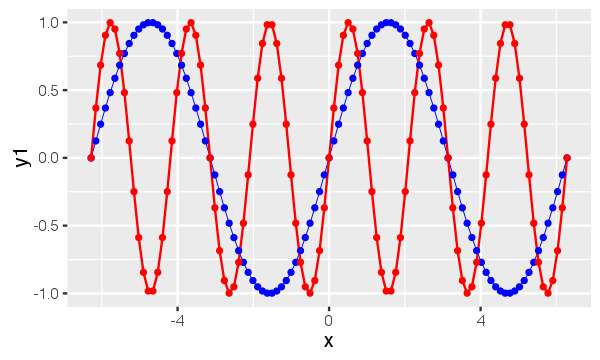

In [10]:
p <- p +                           # el gráfico anterior
     geom_point(aes(x, y1),        # grafica los puntos, la serie y1
                data = df0,        #
                colour = "blue",   #
                size = 1) +        # tamano del punto
     geom_point(aes(x, y2),        # la serie y2
                colour = "red",    #
                size = 1)          # tamano del punto

p

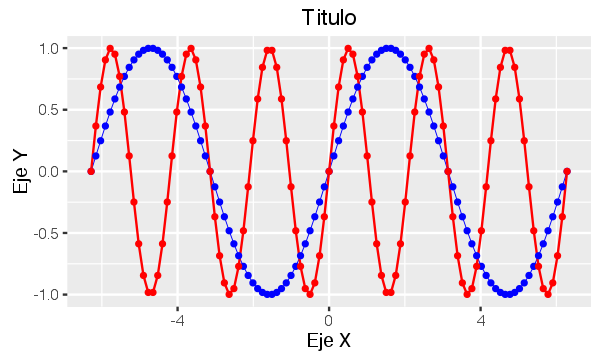

In [11]:
p <- p +                   #
     ggtitle("Titulo") +   # agrega el título
     xlab("Eje X") +       # y las etiquetas de los
     ylab("Eje Y")         # ejes coordenados

p

El mismo resultado podría haberse producido usando la función `labs` de la siguiente manera:

```R
p <- p + 
     labs(title = "Titulo", x = "Eje X", y = "Eje Y")
```


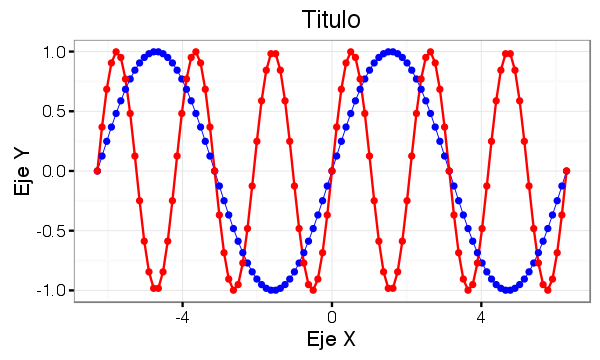

In [12]:
# también es posible cambiar el 'tema' del gráfico.
p <- p + theme_bw()
p

Para continuar con el ejemplo, se construirá un nuevo dataframe en el que todos los valores de las funciones están en la columna `y`; adicionalmente, se agrega la columna `g` la cual indica a que función pertenece cada punto. 

In [13]:
df1 <- data.frame(x = c(x, x), 
                  y = c(sin(x),  sin(3*x)),
                  g = factor(c(rep('F1', 101), rep('F2', 101)))) 

En este caso, `quickplot` permite graficar rápidamente las funciones, de forma similar a como opera la librería `Lattice`. 

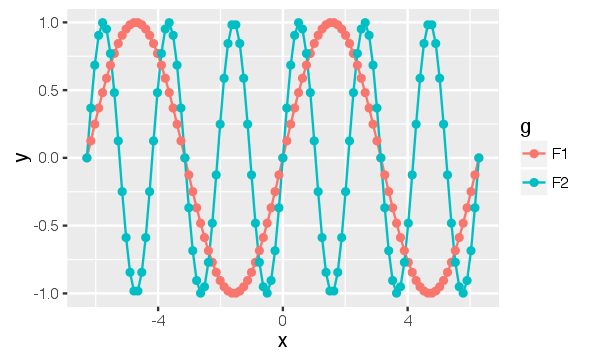

In [14]:
p <- qplot(x, y, 
           data=df1, 
           color=g, 
           geom= c("line", "point"))

p

Las opciones de personalización ya descritas operan normalmente.

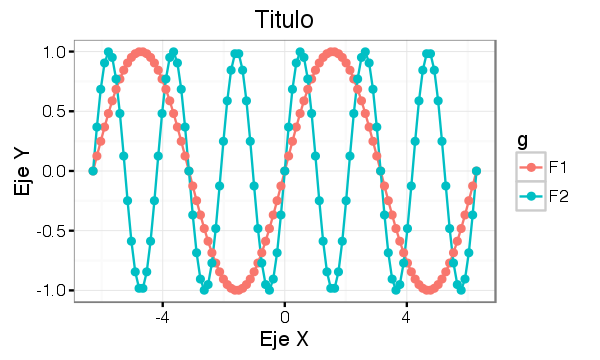

In [15]:
p + theme_bw() + labs(title = "Titulo", x = "Eje X", y = "Eje Y")

La opción `facets` permite definir grupos de forma similar a `ggplot`.

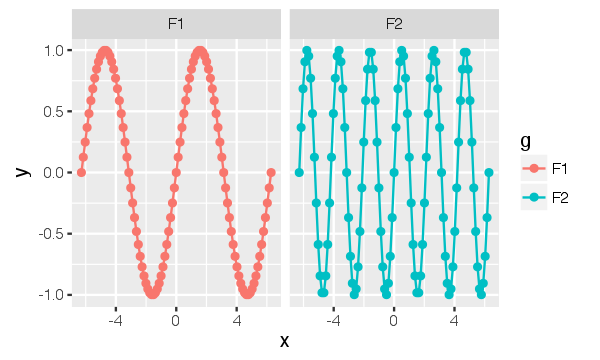

In [16]:
p <- qplot(x, y, 
           data = df1,
           color = g, 
           facets = ~g, 
           geom = c("line", "point"))
p

## Otros ejemplos

### histogram

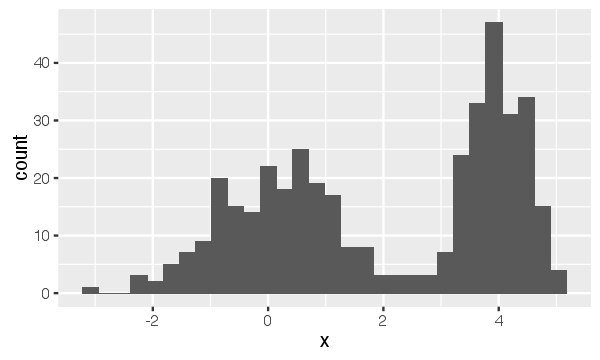

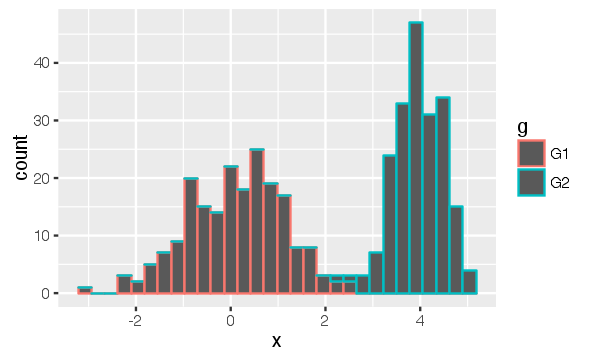

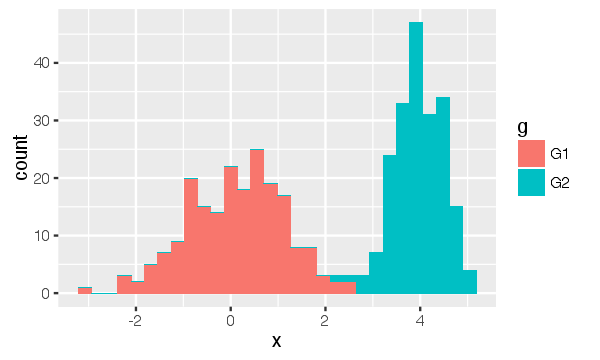

In [17]:
# se generan 200 puntos aletorios normales 
# con u = 0 y s = 1, y u = 4 y s = 0.5
x <- c(rnorm(200, mean = 0, sd = 1.0),  
       rnorm(200, mean = 4, sd = 0.5))
g <- factor(c(rep('G1', 200), rep('G2', 200)))
df2 <- data.frame(x, g)

qplot(x, 
      data=df2, 
      geom="histogram",
      bins = 30)

qplot(x, 
      data=df2, 
      geom="histogram",
      bins = 30,
      color=g)

qplot(x, 
      data=df2, 
      geom="histogram", 
      bins = 30,
      fill=g)

### geom_boxplot

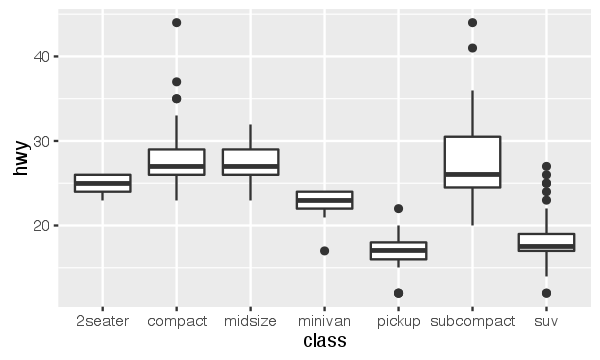

In [18]:
p <- ggplot(mpg, aes(class, hwy))
p + geom_boxplot()

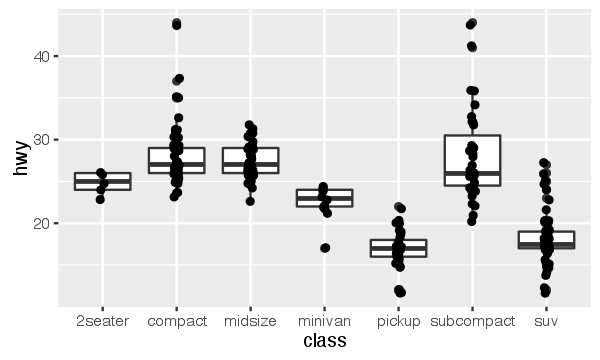

In [19]:
p + geom_boxplot() + geom_jitter(width = 0.1)

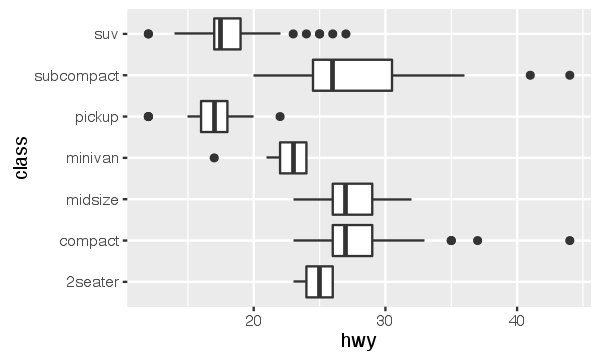

In [20]:
p + geom_boxplot() + coord_flip()

### geom_bar

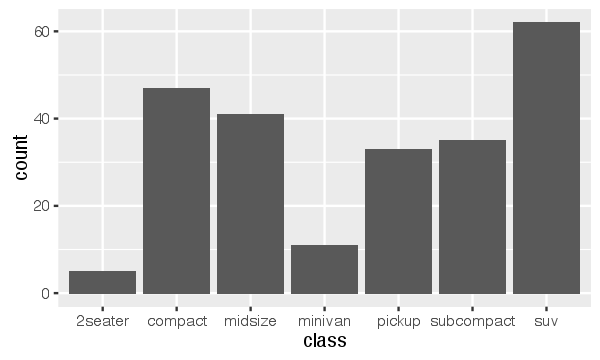

In [21]:
p <- ggplot(mpg, aes(class))
p + geom_bar()

Consulte las referencias presentadas en la sección de biblografía para obtener mayor información sobre `ggplot`. 